In [1]:
import pandas as pd
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
credito = pd.read_csv(r"C:\Users\rozas\Documents\Projetos_GITHUB\MLFLOW_application\dataframe\Credit.csv")

In [3]:
for col in credito.columns:
    if credito[col].dtype == 'object':
        credito[col] = credito[col].astype('category').cat.codes

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [5]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:,20].values

In [6]:
X_treinamento, X_Teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=123)

Modelo: 8b6cff8a1a5a4e579c38d55628581e32


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


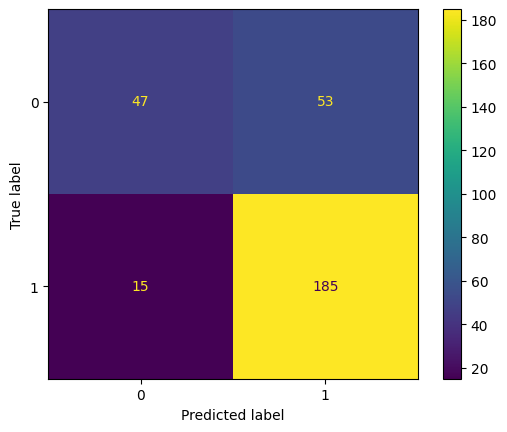

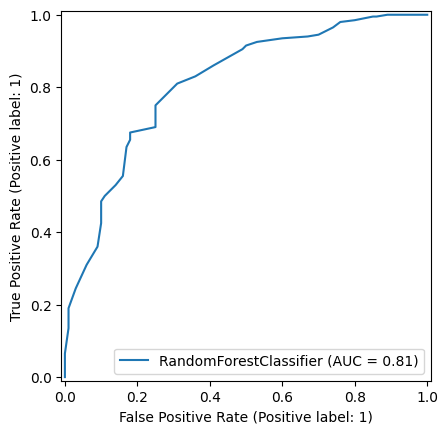

In [11]:
mlflow.set_experiment("Experimento_RF1")

with mlflow.start_run():
    
    n_estimators = 50
    modelorf = RandomForestClassifier(n_estimators=n_estimators)
    modelorf.fit(X_treinamento, y_treinamento)
    previsoes = modelorf.predict(X_Teste)
    
    # Log de Hiperparâmetros
    mlflow.log_param("n_estimators", n_estimators)
    
    # Métricas
    acuracia = accuracy_score(y_teste, previsoes)
    recall = recall_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    auc = roc_auc_score(y_teste, previsoes)
    log = log_loss(y_teste, previsoes)
    
    # Registrar métricas
    mlflow.log_metric("Acurácia", acuracia)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("Roc AUC Score", auc)
    mlflow.log_metric("Log", log)
    
    # Gráficos
    ConfusionMatrixDisplay.from_estimator(modelorf, X_Teste, y_teste)
    plt.savefig("confusionrf05.png")
    RocCurveDisplay.from_estimator(modelorf, X_Teste, y_teste)
    plt.savefig("rocrf05.png")
    
    # Logar os gráficos
    mlflow.log_artifact("confusionrf05.png")
    mlflow.log_artifact("rocrf05.png")
    
    # Modelo
    mlflow.sklearn.log_model(modelorf, "ModeloRF")  # Nome ajustado para refletir o modelo correto
    
    # Informações da execução
    print(f"Modelo: {mlflow.active_run().info.run_uuid}")
    
mlflow.end_run()

In [15]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, 
                             f1_score, roc_auc_score, log_loss, ConfusionMatrixDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt

def treina_rf(n_estimators):
    mlflow.set_experiment("Experimento_RF1")

    with mlflow.start_run():
        
        modelorf = RandomForestClassifier(n_estimators=n_estimators)
        modelorf.fit(X_treinamento, y_treinamento)
        previsoes = modelorf.predict(X_Teste)
        
        # Log de Hiperparâmetros
        mlflow.log_param("n_estimators", n_estimators)
        
        # Métricas
        acuracia = accuracy_score(y_teste, previsoes)
        recall = recall_score(y_teste, previsoes)
        precision = precision_score(y_teste, previsoes)
        f1 = f1_score(y_teste, previsoes)
        auc = roc_auc_score(y_teste, previsoes)
        log = log_loss(y_teste, previsoes)
        
        # Registrar métricas
        mlflow.log_metric("Acurácia", acuracia)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("F1 Score", f1)
        mlflow.log_metric("Roc AUC Score", auc)
        mlflow.log_metric("Log", log)
        
        # Gráficos com nomes baseados em n_estimators
        confusion_matrix_filename = f"confusionrf{n_estimators}.png"
        roc_curve_filename = f"rocrf{n_estimators}.png"
        
        ConfusionMatrixDisplay.from_estimator(modelorf, X_Teste, y_teste)
        plt.savefig(confusion_matrix_filename)
        plt.clf()  # Limpar a figura atual para o próximo gráfico
        RocCurveDisplay.from_estimator(modelorf, X_Teste, y_teste)
        plt.savefig(roc_curve_filename)
        
        # Logar os gráficos
        mlflow.log_artifact(confusion_matrix_filename)
        mlflow.log_artifact(roc_curve_filename)
        
        # Modelo
        mlflow.sklearn.log_model(modelorf, "ModeloRF")  # Nome ajustado para refletir o modelo correto
        
        # Informações da execução
        print(f"Modelo: {mlflow.active_run().info.run_uuid}")
        
    mlflow.end_run()



Modelo: c219061d5f134a918a3411efce71a1d7


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

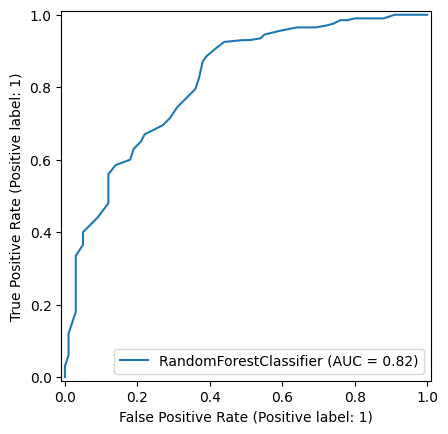

In [16]:
treina_rf(70)

c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo: 65c17157aa264cfd8a5e1e42806a0ad5


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo: cc82fb58372a488c9655d151d76e49a5


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo: 042e30d74f3a4e338290dcbbd473d3e8


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo: 1f66de0e2358461cb4e8cbba865658b1


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo: b623a8d3d0cc4ef2a8daf8cb1c5de56d


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo: 70231d1173794db187572babfec19557


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo: bda9449c516e420b81b81cfcf90680b4
Modelo: 6a913f55734d4b2ca8580236b2a45b72


c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\rozas\anaconda3\envs\MLflow_app\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<Figure size 640x480 with 0 Axes>

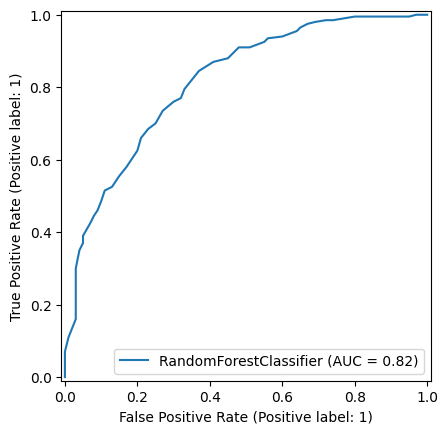

<Figure size 640x480 with 0 Axes>

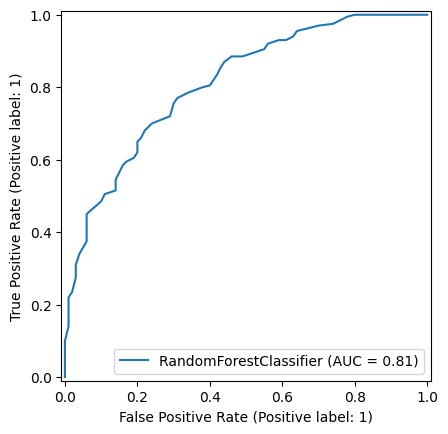

<Figure size 640x480 with 0 Axes>

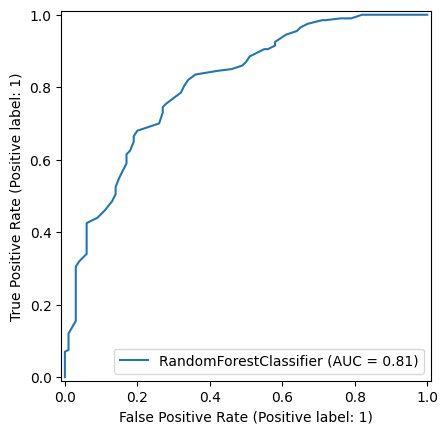

<Figure size 640x480 with 0 Axes>

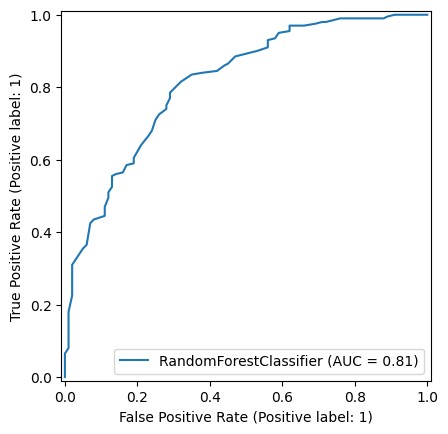

<Figure size 640x480 with 0 Axes>

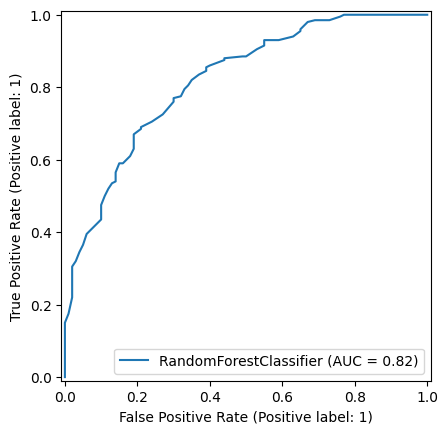

<Figure size 640x480 with 0 Axes>

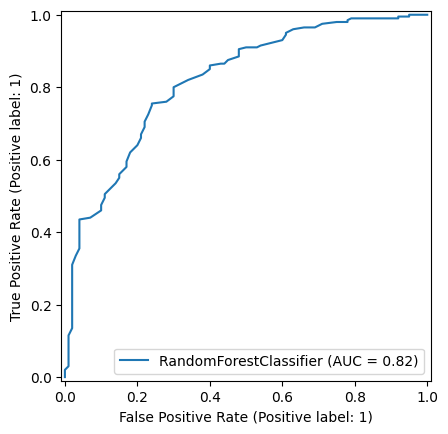

<Figure size 640x480 with 0 Axes>

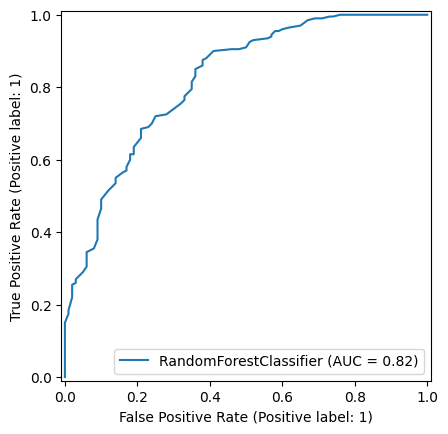

<Figure size 640x480 with 0 Axes>

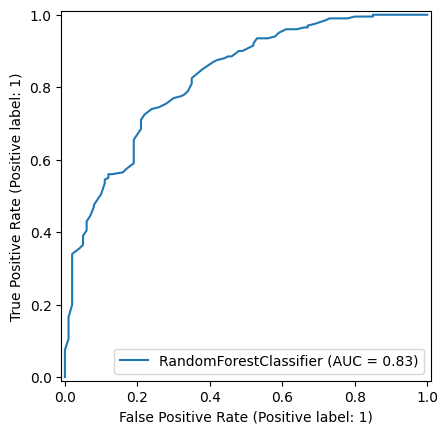

In [17]:
arvores = [80, 90, 100, 110, 120, 130, 140, 150]

for n in arvores:
    treina_rf(n)